<a href="https://colab.research.google.com/github/FranciscoJSSantos/Analise_de_Dados_do_Bolsa_Familia/blob/main/Analise_de_Dados_do_Bolsa_Familia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados do Bolsa Família
---
###Membros:
- Francisco José dos Santos Santana
- Danilo Michell Lisboa de Freitas

###LINK PARA BAIXAR A TABELA DE DADOS NO DRIVE:

- [Dataset_CadastroUnico_Sergipe](https://drive.google.com/drive/folders/1oOvuSPC41LXvvuxFS3jeKCXfFkeSWcI6?usp=sharing)



###LINKS COM ALGUMAS INFORMAÇÕES SOBRE A BASE DE DADOS

- [Mais informações sobre o cadastro único](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_cadastro_unico_semlogo.**pdf**)


- [Mais informações sobre o bolsa família](https://aplicacoes.mds.gov.br/sagirmps/ferramentas/docs/manual_do_pesquisador_gestao_bolsa_familia_semlogo.pdf)


##Imports necessários para funcionamento do projeto

In [2]:
#Imports Necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Carregando as bases de dados de família e pessoas:

#Análise de dados de Famílias

In [72]:
#Carrega a base de dados de familia
data_familia = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_familia_sergipe.csv")
data_familia.head()

,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,dat_atualizacao_familia,cod_local_domic_fam,cod_especie_domic_fam,...,cod_familia_indigena_fam,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,marc_pbf,qtde_pessoas,peso.fam
0,2806206,2,3,183415.0,2006-01-07,2018-09-30,58.0,2018-02-27,1.0,1.0,...,2.0,2.0,P S IVA SALGUEIRO,2421836.0,CRAS CENTRO DE REFERENCIA DA ASSISTENCIA SOCIAL,2.806200e+10,0.0,0,4,550052838636015
1,2803609,2,3,183416.0,2010-03-09,2018-09-30,190.0,2018-07-20,2.0,1.0,...,2.0,2.0,POSTO DE SAUDE RICARDO HAGENBECK,2421380.0,CRAS ANGELA MARIA DE CARVALHO LIMA BOMFIM,2.803602e+10,0.0,0,5,550245146328323
2,2803203,2,3,183417.0,2006-02-25,2018-09-30,100.0,2018-08-21,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550305936601879
3,2805703,2,3,183418.0,2004-05-25,2017-12-15,937.0,2017-11-09,1.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,0,1,550405659971983
4,2805307,1,3,183419.0,2016-03-31,2018-10-15,25.0,2018-10-15,2.0,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,0.0,1,2,550245146328323


In [132]:
df_familia = data_familia.iloc[:,[6,8,9]]

df_familia

,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam
0,58.0,1.0,1.0
1,190.0,2.0,1.0
2,100.0,1.0,1.0
3,937.0,1.0,1.0
4,25.0,2.0,1.0
...,...,...,...
82270,100.0,1.0,1.0
82271,8.0,1.0,1.0
82272,97.0,1.0,1.0
82273,880.0,1.0,1.0


In [133]:
#transformação de dados para qualitativo

###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de Local de Domicílio
df_familia['cod_local_domic_fam'] = pd.cut(df_familia['cod_local_domic_fam'],bins=[1,2,float('inf')],right=False,labels=['Urbana','Rural'])
df_familia.rename(columns = {'cod_local_domic_fam' : 'Local de Domicílio'}, inplace = True)

#transformação de dados de Espécie do domicílio
df_familia['cod_especie_domic_fam'] = pd.cut(df_familia['cod_especie_domic_fam'],bins=[1,2,3,float('inf')],right=False,labels=['Particular Permanente','Particular improvisado','Coletivo'])
df_familia.rename(columns = {'cod_especie_domic_fam' : 'Espécie do domicílio'}, inplace = True)

#transformação de dados de valor de renda media pra grupo de renda
df_familia['vlr_renda_media_fam'] = pd.cut(df_familia['vlr_renda_media_fam'],bins=[0,100.0,200.0,float('inf')],right=False,labels=['Extreme Pobreza','Pobreza','Vulnerável'])
df_familia.rename(columns = {'vlr_renda_media_fam' : 'Grupo de renda'}, inplace = True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

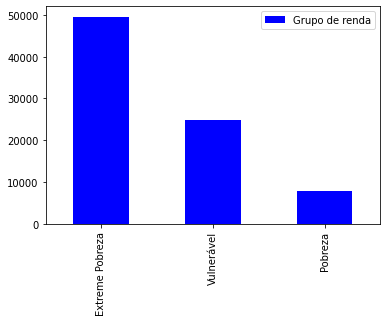

In [134]:
# Grupo de renda
# Extreme Pobreza	- 49562
# Vulnerável	- 24747
# Pobreza	- 7966

tipo_grupo_renda = df_familia['Grupo de renda'].value_counts().to_frame()
tipo_grupo_renda.plot(kind='bar',color='blue')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


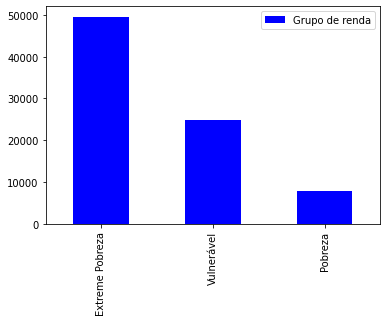

In [136]:
#Dropamos a coluna "Vulnerável" pois eles não se encaixam no grupo para inclusão no bolsa família devivo a sua renda média ser acima de 200,01
grupoRenda = df_familia[df_familia['Grupo de renda'] == 'Vulnerável'].index
df_familia.drop(grupoRenda, inplace = True)


---

#Análise de dados de Pessoas

In [11]:
# Carrega a base de dados de pessoas
data_pessoa = pd.read_csv("/content/drive/MyDrive/Dataset_CadastroUnico_Sergipe/data_pessoas_sergipe.csv")
data_pessoa.head()


,cd_ibge,estrato,classf,id_familia,id_pessoa,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_local_nascimento_pessoa,...,cod_trabalho_12_meses_memb,qtd_meses_12_meses_memb,val_renda_bruta_12_meses_memb,val_renda_doacao_memb,val_renda_aposent_memb,val_renda_seguro_desemp_memb,val_renda_pensao_alimen_memb,val_outras_rendas_memb,peso.fam,peso.pes
0,2805208,1,3,206870.0,24.0,1,19,1,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,100.0,550245146328323,563273265962979
1,2805505,2,3,1936145.0,35.0,1,17,3,4.0,1.0,...,2.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,550245146328323,563340413648347
2,2800308,2,1,4239973.0,103.0,1,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,550245146328323,56328235405831
3,2805604,2,3,2022175.0,324.0,2,4,3,4.0,1.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550390600873778,563301639311753
4,2801306,2,3,2300485.0,328.0,1,7,3,2.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,100.0,NaN,550361832442675,563323831491962


In [63]:
#Criando uma tabela com os dados que vamos utilizar
df_pessoa = data_pessoa.iloc[:,[5,6,7,8,11,12,23]]

df_pessoa

,cod_sexo_pessoa,idade,cod_parentesco_rf_pessoa,cod_raca_cor_pessoa,cod_deficiencia_memb,cod_sabe_ler_escrever_memb,cod_principal_trab_memb
0,1,19,1,4.0,2,1.0,NaN
1,1,17,3,4.0,2,1.0,NaN
2,1,4,3,4.0,2,2.0,NaN
3,2,4,3,4.0,2,2.0,NaN
4,1,7,3,2.0,2,1.0,NaN
...,...,...,...,...,...,...,...
205609,1,33,2,4.0,2,1.0,1.0
205610,1,5,3,4.0,2,2.0,NaN
205611,1,18,3,4.0,2,1.0,NaN
205612,1,56,2,4.0,2,1.0,2.0


In [59]:
#transformação de dados para qualitativo

###obs: rodar uma vez, depois da primeira vez vai dar erro

#transformação de dados de cor ou raça
df_pessoa['cod_raca_cor_pessoa'] = pd.cut(df_pessoa['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,5.0,float('inf')],right=False,labels=['Branca','Preta','Amarela','Parda','Indígena'])
df_pessoa.rename(columns = {'cod_raca_cor_pessoa' : 'Cor ou raça'}, inplace = True)

#transformação de dados de sexo
df_pessoa['cod_sexo_pessoa'] = pd.cut(df_pessoa['cod_sexo_pessoa'],bins=[1.0,2.0,float('inf')],right=False,labels=['Masculino','Feminino'])
df_pessoa.rename(columns = {'cod_sexo_pessoa' : 'Sexo'}, inplace = True)

#transformação de dados de relaçao de parentesco com o RF
df_pessoa['cod_parentesco_rf_pessoa'] = pd.cut(df_pessoa['cod_parentesco_rf_pessoa'],bins=[1,2,3,4,5,6,7,8,9,10,11,float('inf')],right=False,labels=['Pessoa Responsável pela Unidade Familiar - RF','Cônjuge ou companheiro(a)','Filho(a)','Enteado(a)','Neto(a) ou bisneto(a)','Pai ou mãe','Sogro(a)','Irmão ou irmã', 'Genro ou nora','Outro parente', 'Não parente'
])
df_pessoa.rename(columns = {'cod_parentesco_rf_pessoa' : 'Relaçao de parentesco com o RF'}, inplace = True)

#transformação de dados de deficiência
df_pessoa['cod_deficiencia_memb'] = pd.cut(df_pessoa['cod_deficiencia_memb'],bins=[1.0,2.0,float('inf')],right=False,labels=['Sim','Não'])
df_pessoa.rename(columns = {'cod_deficiencia_memb' : 'Pessoa tem deficiência?'}, inplace = True)

#transformação de dados de analfabeto
df_pessoa['cod_sabe_ler_escrever_memb'] = pd.cut(df_pessoa['cod_sabe_ler_escrever_memb'],bins=[1.0,2.0,float('inf')],right=False,labels=['Sim','Não'])
df_pessoa.rename(columns = {'cod_sabe_ler_escrever_memb' : 'Analfabeto?'}, inplace = True)

df_pessoa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,estrato,Sexo,idade,Relaçao de parentesco com o RF,Cor ou raça,Pessoa tem deficiência?,Analfabeto?,cod_principal_trab_memb
0,1,Masculino,19,Pessoa Responsável pela Unidade Familiar - RF,Parda,Não,Sim,NaN
1,2,Masculino,17,Filho(a),Parda,Não,Sim,NaN
2,2,Masculino,4,Filho(a),Parda,Não,Não,NaN
3,2,Feminino,4,Filho(a),Parda,Não,Não,NaN
4,2,Masculino,7,Filho(a),Preta,Não,Sim,NaN
...,...,...,...,...,...,...,...,...
205609,2,Masculino,33,Cônjuge ou companheiro(a),Parda,Não,Sim,1.0
205610,2,Masculino,5,Filho(a),Parda,Não,Não,NaN
205611,2,Masculino,18,Filho(a),Parda,Não,Sim,NaN
205612,2,Masculino,56,Cônjuge ou companheiro(a),Parda,Não,Sim,2.0


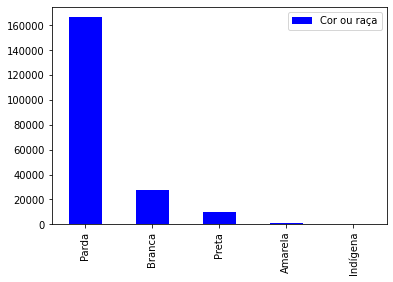

In [39]:
#Parda > Banca > Preta > Amarela > Indígina 
#Cor ou raça
#Parda - 166620
#Branca -	27640
#Preta - 9997
#Amarela -1027
#Indígena - 274

cor_da_raca = df_pessoa['Cor ou raça'].value_counts().to_frame()
cor_da_raca.plot(kind='bar',color='blue')



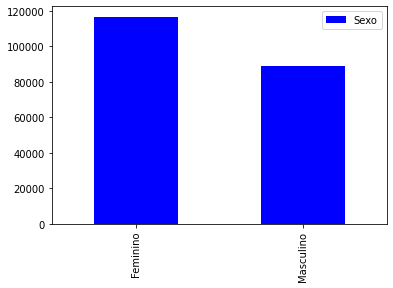

In [40]:
#Mulher > Homem
#Sexo
#Feminino -	116695
#Masculino -	88919

tipo_do_sexo = df_pessoa['Sexo'].value_counts().to_frame()

tipo_do_sexo.plot(kind='bar',color='blue')

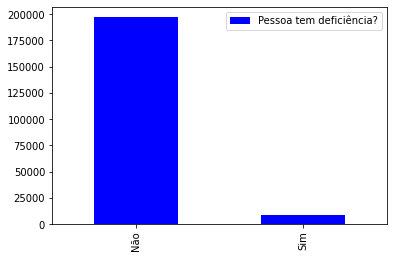

In [44]:
#Não > Sim
#Pessoa tem deficiência?
#Não -	197221
#Sim -	8393

possui_deficiencia = df_pessoa['Pessoa tem deficiência?'].value_counts().to_frame()

possui_deficiencia.plot(kind='bar',color='blue')

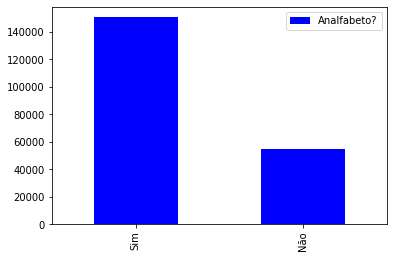

In [51]:
#Sim > Não
#Analfabeto?
#Sim -	150732
#Não -	54861

e_analfabeto = df_pessoa['Analfabeto?'].value_counts().to_frame()

e_analfabeto.plot(kind='bar',color='blue')

| Relaçao de parentesco com o RF | Quantidade |
|---|---|
Filho(a) |	91214
Pessoa Responsável pela Unidade Familia RF |	82275
Cônjuge ou companheiro(a)	| 22975
Neto(a) ou bisneto(a)	| 4139
Irmão ou irmã	| 1633
Outro parente	|1435
Pai ou mãe	| 1224
Enteado(a)	| 372
Não parente	| 170
Genro ou nora	| 133
Sogro(a)	| 44

In [ ]:
#Relaçao de parentesco com o RF


relacao_parentesco = df_pessoa['Relaçao de parentesco com o RF'].value_counts().to_frame()

#relacao_parentesco

relacao_parentesco.plot(kind='bar',color='blue')